A2 de Introdução à computação – 13/06/2016
--
Professor: Renato Rocha Souza  
--

Nome do Aluno(a):

In [ ]:
meu_nome = input('Entre com o seu nome completo: ')
print('Olá, {}!'.format(meu_nome))
print('Bom trabalho!')

In [7]:
# Somente estes módulos podem ser importados para a realização das questões
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup as bs
%matplotlib inline

Questão 1 (1,5 pontos)  

Mostre graficamente que $ \sin ^2 x + \cos^2 x = 1. $  

Dica: para melhor visualização do gráfico, mude a escala dos eixos com $plt.axis([x_{min},x_{max},y_{min},y_{max}])$

In [20]:
xr = np.linspace(0,2*np.pi,1000)

In [28]:
yr = [np.sin(x)**2 + np.cos(x)**2 for x in xr]
yr2 = [np.sin(x) for x in xr]

[0, 6.283185307179586, 0, 1.4]

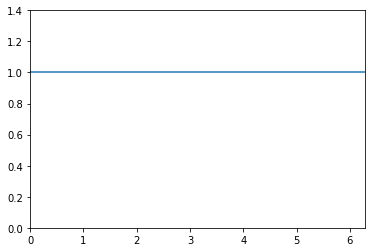

In [38]:
plt.plot(xr,yr)
plt.axis([0,2*np.pi,0,1.4])

Questão 2 (2.5 pontos)  

Partindo do código abaixo, escreva comandos para realizar as seguintes tarefas:
- Identificar os candidatos a nomes próprios do texto e a frequência com que aparecem;
- Identificar as 5 palavras mais comuns;
- Identificar os tritongos;
- Salvar os resultados em um arquivo chamado "respostas_q2.txt" no computador

In [ ]:
url = 'http://norvig.com/big.txt'
page = requests.get(url)
html = page.text
sopa = bs(html, "lxml")
texto = sopa.text

In [ ]:
#seu código aqui

Questão 3 (3 pontos)  

Uma permutação é um arranjo ordenado de objetos. Por exemplo, $ 3124 \ $ é uma das possíveis permutações dos dígitos $1, 2, 3$ e $4$. Se todas as permutações são ordenadas numericamente, chamamos a este arranjo de ordem lexicográfica. As permutações lexicográficas de $0, 1$ e $2$ são:  

$012\;021\;102\;120\;201\;210$    

Qual o milionésimo elemento da ordenação lexicográfica dos dígitos $0, 1, 2, 3, 4, 5, 6, 7, 8$ e $9$?   

In [ ]:
#seu código aqui

Questão 4 (3 pontos) 

Implemente em Python uma classe chamada “Drone” com as seguintes propriedades:  
- Quando instanciado, tem bateria carregada e está na posição $(x=0,y=0,z=0)$ metros;  
- Possui bateria para duração 20 minutos;  
- Consegue andar 1 m/s na vertical e 2 m/s na horizontal;  
- Possui o metodo “voar”, que recebe uma coordenada de destino $(x_1,y_1)$. Esse método calcula a distância a navegar e avalia se o drone possui energia para chegar nestas coordenadas.  
- Possui métodos para carregar a bateria, dizer a autonomia da bateria (em segundos), dizer a distância percorrida desde a última carga e a distância total percorrida desde que foi instanciado.  
- Possui um método para dizer a coordenada atual

OBS: Considere que o drone sempre ascende verticalmente até 20m antes de se deslocar horizontalmente, e percorre a mesma distância verticalmente. A distância percorrida na horizontal é o menor caminho entre as coordenadas de origem e destino. Use a fórmula: $$distância = \sqrt{(x_1-x_0)^2 + (y_1-y_0)^2}$$

In [79]:
class Drone:
    def __init__(self):
        self.x = 0
        self.y = 0
        self.z = 0
        self.bateria = 20 * 60
        self.odometro_total = 0 
        self.odometro_parcial = 0
        
    def mostra_carga(self):
        print('A Carga da bateria atual é de {:.3f} segundos de vôo'.format(self.bateria))
        
    def carrega_bateria(self):
        self.mostra_carga()
        print('Bateria sendo carregada...')
        self.bateria = 20 * 60
        self.odometro_parcial = 0
    
    def mostra_coordenada(self):
        print('O Drone se encontra em: \nX:\t{}\nY:\t{}\nZ:\t{}'.format(self.x, self.y, self.z))
        print('O Drone andou {:.3f} metros no total'.format(self.odometro_total))
        print('O Drone andou {:.3f} mestros desde a última carga'.format(self.odometro_parcial))
    
    def voar_para(self,x,y):
        distancia = ((x-self.x)**2 + (y-self.y)**2)**0.5
        tempo_de_voo = 20 + distancia/2 + 20
        print('O tempo de vôo estimado é de {:.3f} segundos'.format(tempo_de_voo))
        if self.bateria >= tempo_de_voo:
            print('Voando...')
            self.x = x
            self.y = y
            self.bateria -= tempo_de_voo
            self.odometro_total += distancia
            self.odometro_parcial += distancia
            self.mostra_coordenada()
        else:
            print('A bateria só tem autonomia para {:.3f} segundos de vôo'.format(self.bateria))


In [80]:
my_drone = Drone()

In [81]:
my_drone.mostra_coordenada()

O Drone se encontra em: 
X:	0
Y:	0
Z:	0
O Drone andou 0.000 metros no total
O Drone andou 0.000 mestros desde a última carga


In [82]:
my_drone.voar_para(30,45)

O tempo de vôo estimado é de 67.042 segundos
Voando...
O Drone se encontra em: 
X:	30
Y:	45
Z:	0
O Drone andou 54.083 metros no total
O Drone andou 54.083 mestros desde a última carga


In [74]:
my_drone.mostra_carga()

A Carga da bateria atual é de 1105.917 segundos de vôo


In [75]:
my_drone.voar_para(10,2000)

O tempo de vôo estimado é de 1995.102 segundos
A bateria só tem autonomia para 1105.917 segundos de vôo


In [76]:
my_drone.carrega_bateria()

A Carga da bateria atual é de 1105.917 segundos de vôo
Bateria sendo carregada...


Questão Bônus (0,5 pontos)  

O problema de Monty Hall, também conhecido por paradoxo de Monty Hall é um problema matemático e paradoxo que surgiu a partir de um concurso televisivo dos Estados Unidos chamado "Let’s Make a Deal", exibido na década de 1970. O jogo consiste no seguinte: Monty Hall (o apresentador) apresentava 3 portas aos concorrentes, sabendo que atrás de uma delas está um carro (prêmio bom) e que as outras têm prêmios de pouco valor.

- Na 1ª etapa o concorrente escolhe uma porta (que ainda não é aberta);  
- Em seguida, Monty abre uma das outras duas portas que o concorrente não escolheu, sabendo de antemão que o carro não se encontra na porta que abrirá;  
- Agora com duas portas apenas para escolher — pois uma delas já se viu, na 2ª etapa, que não tinha o prêmio — e sabendo que o carro está atrás de uma delas, o concorrente tem que se decidir se permanece com a porta que escolheu no início do jogo e abre-a ou se muda para a outra porta que ainda está fechada para então a abrir.  

Demonstre graficamente que é mais provável ganhar o prêmio se trocar de porta do que se não o fizer. Quais as probabilidade de acertar, em ambos os casos?

In [ ]:
#seu código aqui

Auto-avaliação (0,5 pontos)  
Escreva sua auto-avaliação (mínimo de 3 linhas) e atribua a esta um valor entre 0 e 0,5, levando em consideração o aproveitamento na disciplina.  